## CM3015 Midterm Coursework
**Aim**: Comparison and finding of best ML model for dataset
<br>**Chosen dataset**: Hand-written digits dataset on scikit-learn
<br>**Chosen algorithms**: kNN model and decision tree model

### Methodology, Analysis and Evaluation
Classifier evaluation metrics chosen for this project is accuracy, precision and recall. Focus will be on finding the highest accuracy for each model.<br>**No cross-validation was conducted due to time constraints.**

In [3]:
## set matplotlib backend to inline
%matplotlib inline

## import modules
# basic modules
from sklearn import datasets
import numpy as np
import math
# modules for kNN
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report

## Importing dataset
This coursework focuses on the **hand-written digits** dataset from scikit-learn. This is a 1797 sample data categorising 10 digits using 16 features.<br>The first step is to load the dataset, and understanding the data. `X` will store the data while `y` will store the labels.

In [4]:
## CODE IS SELF WRITTEN
## loading digits dataset
digits = datasets.load_digits()
# print("feature_names:", digits.feature_names)
X = digits.data
y = digits.target

## Train-test split helper function
As it is unknown if the requirement prevents the use of sklearn's `train_test_split` a self implemented function will be used.<br>The dataset will now be split into a training set and testing set, a 80-20 train-test split is conducted for this project.

In [5]:
## CODE IS SELF WRITTEN
## train-test split
def train_test_split(X, y, test_size):
    '''
    splitting data input and labels based on test_size
    -----
    Inputs:
        - X: input data
        - y: input labels
        - test_size: portion of dataset to be test set (between 0 and 1)
    
    Outputs:
        - X_train: array of training data
        - X_test: array of testing data
        - y_train: array of training labels
        - y_test: array of testing labels for prediction
    -----
    '''
    
    # randomising input using fixed seed
    np.random.seed(28)
    # changing X to evenly spaced elements based on input
    lis = np.arange(X.shape[0])
    # randomising sequence
    lis = np.random.permutation(lis)
    X = X[lis]
    y = y[lis]
    
    # slicing start based on test_size for test data
    slice_idx = int(len(X) * test_size)
    X_test = X[:slice_idx]
    y_test = y[:slice_idx]
    
    # slicing end based on test_size for train data
    X_train = X[slice_idx:]
    y_train = y[slice_idx:]
    
    return(X_train, X_test, y_train, y_test)

In [6]:
## train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 0.2)

## kNN classifier
### 1. Getting K value and benchmark using pre-existing kNN model
To begin, we will first find the best K value to focus the model on. For this, we will use the pre-existing ```KNeighborsClassifier``` function from sklearn.

The resource for using KNeighborsClassifier is found on <a href = "https://www.analyticsvidhya.com/blog/2021/04/simple-understanding-and-implementation-of-knn-algorithm/" style = "text-decoration: none">Analytics Vidhya</a>.<br>From the graph, K value of 2 will be chosen.<br>Using K value of 2, the accuracy we should be working towards is **98.6%**.

Benchmark accuracy: 0.9860724233983287


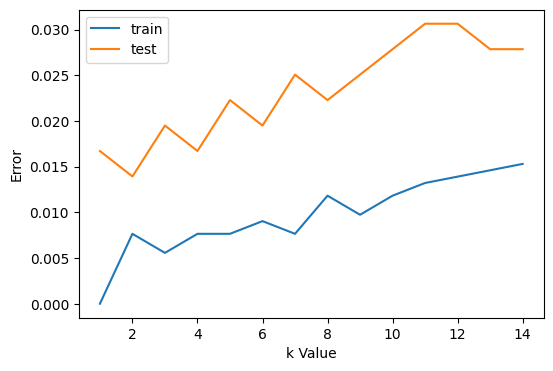

In [18]:
## CODE FULLY TAKEN FROM ANALYTICS VIDHYA
## 1. finding best K value
error1 = []
error2 = []

# having range of K values
for k in range(1, 15):
    # creating kNN with k neighbors
    knn = KNeighborsClassifier(n_neighbors = k)
    # fitting kNN using training data
    knn.fit(X_train, y_train)
    # storing prediction + saving inaccurate predictions
    y_pred1 = knn.predict(X_train)
    error1.append(np.mean(y_train !=  y_pred1))
    y_pred2 = knn.predict(X_test)
    error2.append(np.mean(y_test !=  y_pred2))

# plotting errors for training and testing data
plt.figure(figsize = (6, 4))
plt.plot(range(1, 15), error1, label = "train")
plt.plot(range(1, 15), error2, label = "test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

## 2. accuracy score to work towards
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Benchmark accuracy:", accuracy)

### 2. Creating helper function
The first model chosen for implementation is the k-Nearest Neighbour classification.
<br>To start, a helper function to calculate the distance between inputs will be created.

In [8]:
## CODE IS SELF WRITTEN
## helper code for kNN (distance calculator)
def calc_dist(a, b, dist_type):
    '''
    calculates distance between 2 data points
    -----
    Inputs:
        - a: data input 1
        - b: data input 2
        - dist_type: type of distance calculation
          > manhattan or euclidean
        
    Output:
        - dist: distance calculated between the data points
    -----
    '''
    
    if dist_type == "euclidean":
        # using working version of euclidean distance
        dist = np.linalg.norm(a-b, axis = 0)
        return dist
    elif dist_type == "manhattan":
        # using working version of manhattan distance
        dist = 0
        for i in range(len(a)):
            dist += math.fabs(a[i] - b[i])
        return dist
    else:
        return "invalid type"

### 3. Creation of kNN classifier
The kNN algorithm will now be create with a default K value of 2.<br>It is then ran twice to get the predictions of the model using both the Euclidean and Manhattan distances.

In [9]:
## CODE IS SELF WRITTEN
def kNNAlgo(X_train, y_train, X_test, dist_type, k = 2):
    '''
    creating a K-Nearest Neighbour model from scratch
    -----
    Inputs:
        - X_train: array of training data
        - y_train: array of training labels
        - X_test: array of testing data
        - dist_type: type of distance calculation
          > manhattan or euclidean
        - k: number of nearest neighbours to conduct model (chosen 2)
    -----
    Outputs:
        - y_pred: predicted output labels using X_test
    '''
    
    predictions = []
    
    for a in X_test:
        # calculating distance between training and testing data
        distances = [calc_dist(a, b, dist_type) for b in X_train]
        # indices of kNN by sorting distances, selecting first k indices
        kNearest_idx = np.argsort(distances)[:k]
        # getting labels corresponding to k nearest neighbors
        kNearest_label = [y_train[idx] for idx in kNearest_idx]
        # counting occurrences of each labels
        count = np.bincount(kNearest_label)
        # appending most common labels
        predictions.append(np.argmax(count))

    return np.array(predictions)

In [10]:
y_pred1 = kNNAlgo(X_train, y_train, X_test, "euclidean")
# print(f"Euclidean predicted y value:\n{y1}\n\nEuclidean real y value:\n{y_test}")
y_pred2 = kNNAlgo(X_train, y_train, X_test, "manhattan")
# print(f"Manhattan predicted y value:\n{y2}\n\nManhattan real y value:\n{y_test}")

### 4. Evaluation of kNN classifier
To evaluate the performance of the classifier, accuracy, precision and recall will be calculated using sklearn's ```classification_report``` function.<br>From the output, it is seen that Euclidean distance has a higher accuracy of 99% whilst Manhattan distance has an accuracy of 97%.<br>Model using Euclidean distance has reached the benchmark accuracy.

In [11]:
target_names = [str(i) for i in digits.target_names]
report = classification_report(y_test, y_pred1, target_names = target_names)
print("EUCLIDEAN DISTANCE")
print("Classification Report:\n", report)

report = classification_report(y_test, y_pred2, target_names = target_names)
print("\nMANHATTAN DISTANCE")
print("Classification Report:\n", report)

EUCLIDEAN DISTANCE
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.95      1.00      0.97        39
           2       1.00      0.98      0.99        43
           3       0.95      1.00      0.97        39
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        25
           6       1.00      1.00      1.00        34
           7       1.00      1.00      1.00        37
           8       0.98      0.95      0.96        43
           9       1.00      0.94      0.97        32

    accuracy                           0.99       359
   macro avg       0.99      0.99      0.99       359
weighted avg       0.99      0.99      0.99       359


MANHATTAN DISTANCE
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.89      1.00      0.94  

## Decision Tree model
### 1. Creating helper function
The second model chosen for implementation is the Decision Tree model.
<br>To start, a set of helper functions are required:
- calculation of impurity in a set of labels
- finding possible feature splits

In [12]:
## CODE IS SELF WRITTEN
## helper code for DT
## 1. impurity calculator
def calc_impurity(labels):
    '''
    calculates impurity in set of labels using Gini impurity
    -----
    Input:
        - labels: array of labels (y)
        
    Output:
        - impurity: Gini impurity of the labels
    -----
    '''
    
    # getting unique classes and their respective counts
    uniq_classes, class_counts = np.unique(labels, return_counts = True)
    # getting probabilities of each class appearing
    probabilities = class_counts / len(labels)
    # getting impurity of labels based using Gini impurity
    impurity = 1 - np.sum(probabilities ** 2)
    return impurity

## 2. getting potential splits
def get_potential_features(feature_col):
    '''
    gets potential features to conduct splits on, this is not the BEST features yet
    -----
    Input:
        - feature_col: array of data based on feature
        
    Outputs:
        - thresholds: array of potential split points between each unique value
        - uniq_vals: array of unique values in the feature column data
    -----
    '''
    
    # getting unique values
    uniq_vals = np.unique(feature_col)
    # finding value between each unique value
    thresholds = (uniq_vals[:-1] + uniq_vals[1:]) / 2
    return thresholds, uniq_vals

### 2. Getting best split
This is followed by finding the best split using the potential splits.<br>This was done by recursively checking for the lowest impurity through each potential split for each feature and storing the new best lowest impurity.

In [19]:
## CODE IS SELF WRITTEN
def get_best_split(X, y):
    '''
    gets best split by calculating impurity after each split
    -----
    Inputs:
        - X: array of inputs
        - y: array of labels
        
    Output:
        - best_split: dictionary of best feature with its threshold
    -----
    '''
    
    sample_size, num_features = X.shape
    
    # if sample is 1, no one splits to be made
    if sample_size <= 1:
        return None
    
    # getting original impurity of labels
    curr_impurity = calc_impurity(y)
    # default best impurity to infinity and best split to none
    best_impurity = float("inf")
    best_split = None
    
    for feature in range(num_features):
        # getting threshold and unique values for each feature
        thresholds, uniq_vals = get_potential_features(X[:, feature])
        
        for threshold in thresholds:
            # left indexes boolean array where value in feature column <= threshold
            left_idxs = X[:, feature] <= threshold
            # right indexes negation of left indexes
            right_idxs = ~left_idxs
            
            # calculating impurity of sub-trees
            left_impurity = calc_impurity(y[left_idxs])
            right_impurity = calc_impurity(y[right_idxs])
            # calculating total impurity
            total_impurity = (len(y[left_idxs]) * left_impurity +
                              len(y[right_idxs]) * right_impurity) / sample_size
            
            # checking for split with better impurity than original impurity
            if total_impurity < best_impurity:
                best_impurity = total_impurity
                # updating best split with feature and its threshold
                best_split = {"feature": feature, "threshold": threshold}
    
    return best_split

### 3. Creation of Decision Tree
The Decision Tree will now be done by getting the best split, conducting it and running ```get_best_split``` on each sub_tree.
<br>This would return the tree structure that best categorises the inputs to its labels.

In [14]:
## CODE IS SELF WRITTEN
def grow_DT(X, y, depth = 0, max_depth = None):
    '''
    growing the Decision Tree fully
    -----
    Inputs:
        - X: array of inputs
        - y: array of labels
        - depth: current depth of tree
        - max_depth: limiting maximum depth wanted
        
    Outputs:
        - dictionary of best feature, threshold, left and right sub-tree
    -----
    '''
    
    sample_size, num_features = X.shape
    uniq_classes = np.unique(y)
    
    # stopping when only 1 unique class or depth reaches max_depth
    if (len(uniq_classes) == 1) or (depth == max_depth):
        # returning class and its count
        return {"class": uniq_classes[0], "count": len(y)}
    
    best_split = get_best_split(X, y)
    
    # stopping if best_split output is none
    if best_split is None:
        return {"class": uniq_classes[0], "count": len(y)}
    
    # storing left indexes when element in feature less than threshold (boolean array)
    left_idxs = X[:, best_split["feature"]] <= best_split["threshold"]
    # storing right indexes as negation of left
    right_idxs = ~left_idxs
    
    # growing subtree and storing left and right subtrees and increasing depth
    left_subtree = grow_DT(X[left_idxs], y[left_idxs], depth + 1, max_depth)
    right_subtree = grow_DT(X[right_idxs], y[right_idxs], depth + 1, max_depth)
    
    return {
        "feature": best_split["feature"],
        "threshold": best_split["threshold"],
        "left": left_subtree,
        "right": right_subtree
    }

The prediction function will then be created to iteratively check if the value falls to the left or right subtree until it reaches the root leaf and prints the class.<br>This will done for the batch of data using ```DT_predict_batch```. The max depth will be set to 10 as there are 10 digits to be classified.

In [15]:
## CODE IS SELF WRITTEN
def DT_predict(x, tree):
    '''
    creating prediction to input value based on decision tree
    -----
    Inputs:
        - x: input value
        - tree: decision tree
    
    Output:
        - predicted class
    -----
    '''
    # tree has reached root leaf
    if "class" in tree:
        return tree["class"]
    
    # checking if value falls to left or right subtree
    if x[tree["feature"]] <= tree["threshold"]:
        return DT_predict(x, tree["left"])
    else:
        return DT_predict(x, tree["right"])

def DT_predict_batch(X, tree):
    '''
    creating predictions to the set of inputs based on decision tree
    -----
    Inputs:
        - X: array of inputs
        - tree: decision tree
    
    Outputs:
        - array of predicted classes for each input
    -----
    '''
    
    # returning array of predictionf for each input
    return np.array([DT_predict(x, tree) for x in X])

In [16]:
## CODE IS SELF WRITTEN
tree = grow_DT(X_train, y_train, max_depth = 10)
y_pred3 = DT_predict_batch(X_test, tree)
#print(f"Actual values:\n{y_test}\nPredicted values:\n{y_pred}")

### 4. Evaluation of Decision Tree model
To evaluate the performance of the classifier, accuracy, precision and recall will be calculated using sklearn's ```classification_report``` function.<br>From the output, it is seen that the Decision Tree model performed relatively poorly when compared to the kNN model with its accuracy rate of 75%.

In [17]:
target_names = [str(i) for i in digits.target_names]
report = classification_report(y_test, y_pred3, target_names = target_names)
print("Decision Tree Classification Report:\n", report)

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.53      1.00      0.70        31
           1       0.77      0.85      0.80        39
           2       0.84      0.88      0.86        43
           3       0.74      0.72      0.73        39
           4       0.82      0.89      0.85        36
           5       0.80      0.80      0.80        25
           6       0.94      0.88      0.91        34
           7       0.86      0.84      0.85        37
           8       0.56      0.12      0.19        43
           9       0.68      0.72      0.70        32

    accuracy                           0.75       359
   macro avg       0.75      0.77      0.74       359
weighted avg       0.75      0.75      0.73       359



## Conclusion
The collated evaluation metrics are as follows:
<br>**Findings**: kNN model using Euclidean distance performed the best overall whilst Decision Tree model performed the worst.

<table style = "width: 70%; float: left; font-size: 14px">
  <tr>
    <th>Metrics</th>
    <th>kNN (Euclidean)</th>
    <th>kNN (Manhattan)</th>
    <th>Decision Tree</th>
  </tr>
  <tr>
    <td>Precision (avg)</td>
    <td>99%</td>
    <td>97%</td>
    <td>75%</td>
  </tr>
  <tr>
    <td>Recall (avg)</td>
    <td>99%</td>
    <td>97%</td>
    <td>77%</td>
  </tr>
   <tr>
    <td>F1-Score (avg)</td>
    <td>99%</td>
    <td>97%</td>
    <td>74%</td>
  </tr>
   <tr>
    <td>Accuracy</td>
    <td>99%</td>
    <td>97%</td>
    <td>75%</td>
  </tr>
</table>